# Calculus For Machine Learning

In this exercise, you can learn prerequisite knowledge of calculus for machine learning.

**Calculus** is the mathematical study of continuous change. There are two branches in calculus, which are differential and integral calculus. 

In this module, we deal with the differential calculus that is related to gradient-based learning algorithms such as gradient descent. Also, it is essential for understanding the backpropagation used in training a neural network.
(more details: https://en.wikipedia.org/wiki/Calculus)


(References:
https://github.com/hrnbot/Basic-Mathematics-for-Machine-Learning/tree/master/Basics%20of%20Calculus%20by%20Hiren,
http://wiki.fast.ai/index.php/Calculus_for_Deep_Learning#Derivatives_in_Deep_Learning)

At first, import required python modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Derivatives

Derivatives of a function measure the change of output with respect to the change of input. In geometric interpretation, derivatives are the slope of the graph of the function. 

In the following example, you can show the slope between two points.

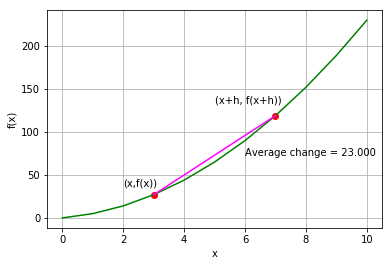

In [3]:
# define an arbitary function 
def f(x):
    return 2 * (x**2) + 3 * x

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the x point
x1 = 3
y1 = f(x1)

# set the increment
h = 4

# set the x+h point
x2 = x1+h
y2 = f(x2)

# Calculate the slope by dividing the deltas
a = (y2 - y1)/(x2 - x1)

# Create an array of x values for the secant line
sx = [x1,x2]

# Use the function to get the y values
sy = [f(i) for i in sx]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the x point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))', (x1,y1), xytext=(x1-1, y1+10))

# Plot the x+h point
plt.scatter(x2,y2, c='red')
plt.annotate('(x+h, f(x+h))', (x2,y2), xytext=(x2-2, y2+15))

# Plot the secant line
plt.plot(sx,sy, color='magenta')

# Display the calculated average rate of change
plt.annotate('Average change = %.3f' % a, (x2-1, (y2+y1)/2))

plt.show()

When the increment $h$ is very small value, you can get the derivative of the function at the point $(x, y)$

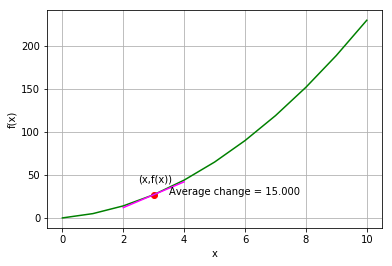

In [4]:
# set the increment
h = 1e-10

# set the x+h point
x2 = x1+h
y2 = f(x2)

# Calculate the slope by dividing the deltas
a = (y2 - y1)/(x2 - x1)

# Create an array of x values for the secant line
sx = [x1,x2]

# Use the function to get the y values
sy = [f(i) for i in sx]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the x point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))', (x1,y1), xytext=(x1-0.5, y1+15))

# Approximate the tangent slope and plot it
m = (y2-y1)/(x2-x1)
xMin = x1 - 1
yMin = y1 - (1*m)
xMax = x1 + 1
yMax = y1 + (1*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

# Display the calculated average rate of change
plt.annotate('Average change = %.3f' % a, (x2+0.5, (y2+y1)/2))

plt.show()

As you can see the above figure, the derivative of the function at the point $(x, y)$ are the slope of targent line at the point. 

It can be calculated with the below equations.


The function is 

$f(x)=2x^2+3x$
                                
The slope between two points can be calculated as below.

$f'(x)=\cfrac{f(x+h)-f(x)}{h}$
                                
For calculating the derivative of the function, the increment $h$ is getting very small value.

$f'(x)=\lim_{h\to0}\cfrac{f(x+h)-f(x)}{h}=\lim_{h\to0}\cfrac{(2(x+h)^2+3(x+h))-(2x^2+3x)}{h}$

$f'(x)=\lim_{h\to0}\cfrac{4xh+2h^2+3h}{h}=\lim_{h\to0}4x+2h+3=4x+3$

Therefore, the derivative of the function is

$f'(x)=4x+3$

At the point $x=3$, the derivative is $f'(3)=15$.

# Partial Derivatives

A partial derivative of a multivariable function is the derivative with respect to one variable, with other variables held as constant.

For instance, a function is

$f(x) = x^2 + y^2$

The partial derivative with respect to $x$ is

$\cfrac{\partial f}{\partial x} = 2x$

The partial derivative with respect to $y$ is

$\cfrac{\partial f}{\partial y} = 2y$



# Gradients

A gradient is a vector that contains the partial derivatives of multivariable functions. 

From the previous example, the gradient is a vector containing the partial derivatives. 

$\nabla f(x, y) = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix} 2x \\ 2y\end{bmatrix}$

In the next code block, you can see the geometric meaning of the gradient. The contour is the function $f(x) = x^2 + y^2$. The direction of the arrows means the direction of the gradients, and the width is proportional to the value of the gradients. 

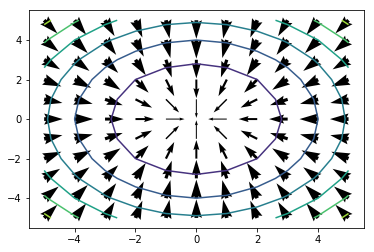

In [11]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

## Create a uniform grid
el = np.arange(-5,6)
nx, ny = np.meshgrid(el, el, sparse=False, indexing='ij')

## flatten the gird to 1-d and compute the value of the function z
x_coord = []
y_coord = []
z = []
for i in range(11):  
    for j in range(11):
        x_coord.append(float(-nx[i,j]))
        y_coord.append(float(-ny[i,j]))       
        z.append(nx[i,j]**2 + ny[i,j]**2)

## perform vector arithmetic to get the x and y gradients        
x_grad = [-2 * x for x in x_coord]
y_grad = [-2 * y for y in y_coord] 

## Plot the arrows using  width for gradient
plt.xlim(-5.5,5.5)
plt.ylim(-5.5,5.5)
for x, y, xg, yg in zip(list(x_coord), list(y_coord), list(x_grad), list(y_grad)):
    if x != 0.0 or y != 0.0: ## Avoid the zero divide when scaling the arrow
        l = math.sqrt(xg**2 + yg**2)/2.0
        plt.quiver(x, y, xg, yg, width = l, units = 'dots')

## Plot the countours of the function surface
z = np.array(z).reshape(11,11)    
plt.contour(el, el, z)

As you can see, the direction of the gradients is perpendicular to the contours. 

**Also, the value of gradients become smaller when close to the minimum of the functions.**

Therefore, we can use the gradients to find the minimum of the function. 
**The gradient-based learning, such as the gradient descent method, use this idea to find the minimum of a loss function.**